In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import SimpleITK as sitk
# from pilutil import *
# from scipy.misc.pilutil import imread

In [2]:
data = pd.read_csv('lungs_cancer.csv')

In [3]:
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [4]:
data.shape

(59, 7)

In [5]:
data.tail()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
54,Ernest,Borgnine,26,13,6,1,0
55,Alec,Guinness,77,20,5,4,1
56,Charlton,Heston,75,15,3,5,1
57,Gregory,Peck,43,30,3,8,1
58,Sidney,Poitier,51,25,9,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
Name       59 non-null object
Surname    59 non-null object
Age        59 non-null int64
Smokes     59 non-null int64
AreaQ      59 non-null int64
Alkhol     59 non-null int64
Result     59 non-null int64
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [7]:
data.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,59.0,42.627119,16.235230,18.0,29.0,39.0,55.0,77.0
Smokes,59.0,15.067797,7.984607,0.0,10.0,15.0,20.0,34.0
AreaQ,59.0,5.203390,2.461984,1.0,3.0,5.0,7.5,10.0
Alkhol,59.0,3.237288,2.380517,0.0,1.0,3.0,5.0,8.0
Result,59.0,0.474576,0.503640,0.0,0.0,0.0,1.0,1.0


In [9]:
data.dtypes

Name       object
Surname    object
Age         int64
Smokes      int64
AreaQ       int64
Alkhol      int64
Result      int64
dtype: object

In [10]:
data.isnull().sum()   # Find the null values

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

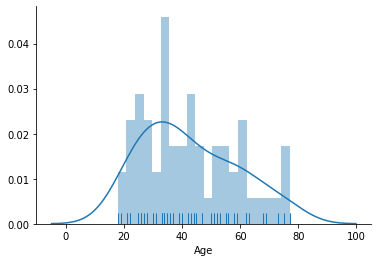

In [11]:
sns.distplot(data['Age'],bins=20,kde=True,rug=True)
sns.despine()

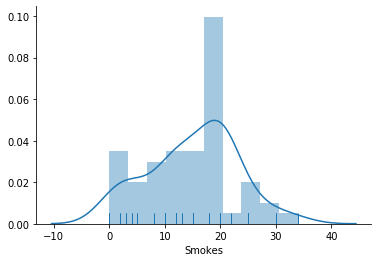

In [12]:
sns.distplot(data['Smokes'],bins=10,kde=True,rug=True)
sns.despine()

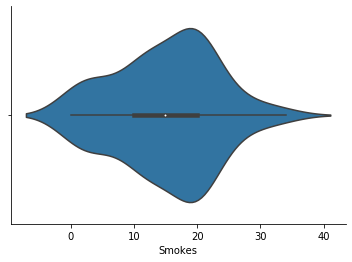

In [13]:
sns.violinplot(x='Smokes',data=data)
sns.despine()

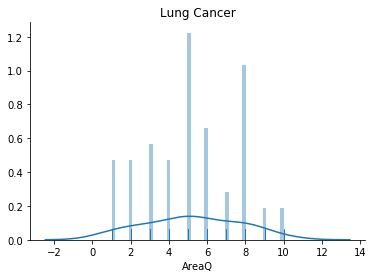

In [14]:
sns.distplot(data['AreaQ'],bins=50,kde=True,rug=True)
plt.title("Lung Cancer")
sns.despine()

Text(0.5, 1.0, 'Lung Cancer')

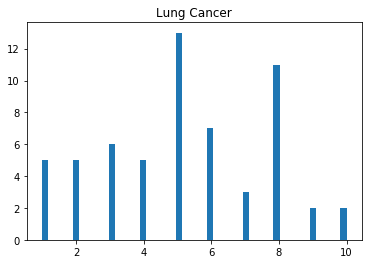

In [15]:
plt.hist(x='AreaQ',data=data,bins=50)
plt.title('Lung Cancer')

In [16]:
data.corr().head()

,Age,Smokes,AreaQ,Alkhol,Result
Age,1.000000,0.053665,-0.268957,0.318621,0.637726
Smokes,0.053665,1.000000,-0.353295,0.469915,0.373444
AreaQ,-0.268957,-0.353295,1.000000,-0.714412,-0.746621
Alkhol,0.318621,0.469915,-0.714412,1.000000,0.810439
Result,0.637726,0.373444,-0.746621,0.810439,1.000000


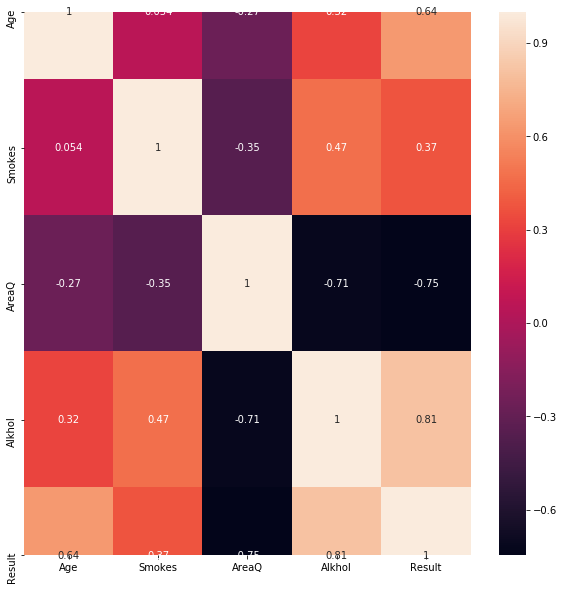

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

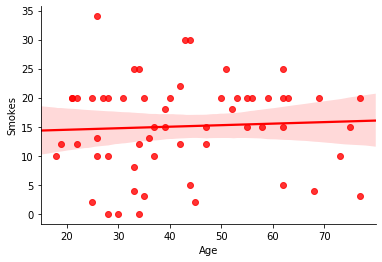

In [18]:
# Bivariate Analysis
sns.regplot(x='Age',y='Smokes',color='r',data=data)
sns.despine()

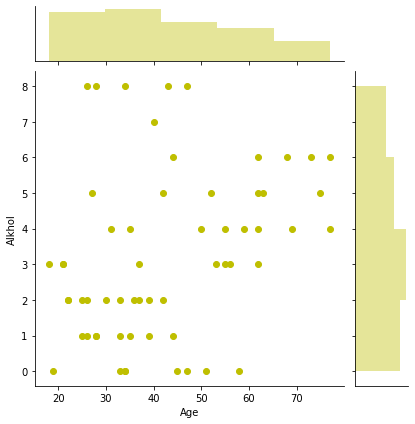

In [19]:
sns.jointplot(x='Age',y='Alkhol',color='y',data=data)
sns.despine()

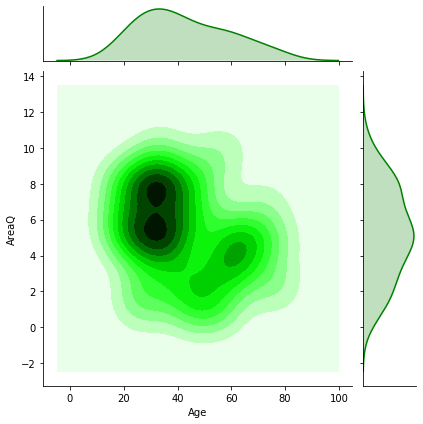

In [20]:
sns.jointplot(x='Age',y='AreaQ',color='g',data=data,kind='kde')
sns.despine()

In [21]:
data.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


Text(0, 0.5, 'Smoking')

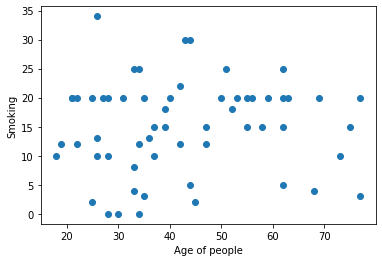

In [22]:
plt.scatter(x='Age',y='Smokes',data=data)
plt.xlabel("Age of people")
plt.ylabel("Smoking")

In [23]:
data['Result'].value_counts()

0    31
1    28
Name: Result, dtype: int64

In [24]:
# Divide the dataset
y = data['Result']
x = data.drop(columns=['Name','Surname','Result'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [27]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state=10,C=20)

In [28]:
data_model = reg.fit(x_train,y_train)

C:\Users\aakas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
y_pred = reg.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
Log_Res = accuracy_score(y_test,y_pred)
print(Log_Res)

1.0


In [32]:
Log_Res = precision_score(y_test,y_pred)
Log_Res = recall_score(y_test,y_pred)
Log_Res = f1_score(y_test,y_pred)
print(Log_Res)

1.0


In [33]:
Log_Res = classification_report(y_test,y_pred)
print(Log_Res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
Ran_For = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',random_state = 20)

In [39]:
data_model = Ran_For.fit(x_train,y_train)

In [40]:
Ran_Pred = Ran_For.predict(x_test)

In [42]:
Ran_For_pred = classification_report(y_test,Ran_Pred)
print(Ran_For_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

In [43]:
kfold = model_selection.KFold(n_splits=10,random_state=10)
D_tree = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=D_tree,n_estimators=10,random_state=10)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
score=results.mean()
print('accuracy=',score)

accuracy= 0.95


In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [46]:
Log_R = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=Log_R, param_grid=param_grid, cv = 3, n_jobs=-1)

In [47]:
grid_result = grid.fit(x, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.983051 using {'dual': True, 'max_iter': 140}


C:\Users\aakas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\aakas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aakas\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [48]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [49]:
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor()
grid= GridSearchCV(estimator = rr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 2)

In [50]:
grid_result = grid.fit(x, y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   28.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.7min finished
C:\Users\aakas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [51]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.829262 using {'bootstrap': True, 'max_depth': 80, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [52]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [53]:
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)
grid_result = grid.fit(x, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.966102 using {'C': 1.0, 'dual': True, 'max_iter': 100}


C:\Users\aakas\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\aakas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aakas\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
